### Heart Attack Analysis & Prediction.Link is given below

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

#### age: The person's age in years

####  sex: The person's sex (1 = male, 0= female)

####  cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic) trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

#### chol: The person's cholesterol measurement in mg/dl

#### fbs: The person's fasting blood sugar (> 120 mg/dl, 1= true; 0 = false)

####  restecg: Resting electrocardiographic measurement (0 normal, 1 having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

#### thalach: The person's maximum heart rate achieved

#### exang: Exercise induced angina (1 = yes; 0 = no)

#### oldpeak: ST depression induced by exercise relative to rest ('ST relates to positions on the ECG plot.)

####  slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

#### ca: The number of major vessels (0-3)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression


In [2]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
data.age.unique().shape

(41,)

In [6]:
data.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [7]:
output = data.output.value_counts()
output

output
1    165
0    138
Name: count, dtype: int64

### Data visualization

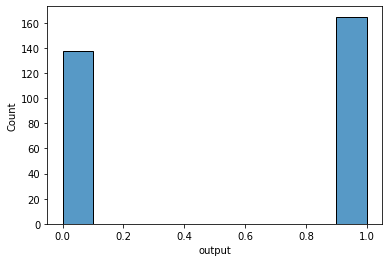

In [8]:
# histogram
sns.histplot(x= 'output',data=data )
plt.show()

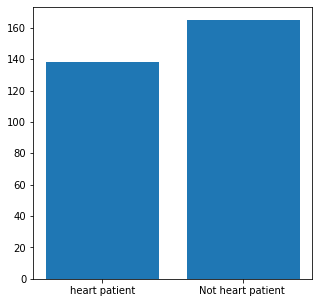

In [9]:
# Bar graph
plt.figure(figsize=(5,5))
plt.bar(output.index,output.values)

plt.xticks([0,1],['heart patient', 'Not heart patient '])
plt.show()

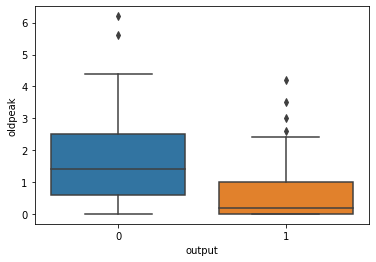

In [10]:
sns.boxplot(x = 'output', y ='oldpeak',data = data)

In [11]:
y = data['output']
x = data.drop(['output'],axis =1)
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [12]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#x=scaler.fit_transform(x)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [13]:
from sklearn.model_selection import train_test_split 

In [14]:
x_train,x_test,y_train,y_test =  train_test_split (x,y,test_size=0.1)

In [15]:
print(x_train)

[[0.47916667 1.         0.         ... 0.5        0.         0.        ]
 [0.75       1.         0.         ... 1.         0.5        0.33333333]
 [0.72916667 1.         0.         ... 0.5        0.25       1.        ]
 ...
 [0.83333333 1.         0.66666667 ... 0.5        0.75       1.        ]
 [0.60416667 0.         0.         ... 0.5        0.         0.66666667]
 [0.70833333 0.         0.66666667 ... 1.         0.         0.66666667]]


### using Logistic regression

In [16]:
m =LogisticRegression(random_state=42)


In [17]:
m.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [18]:
# Predicting the testing data
y_predict_lr = m.predict(x_test)
y_predict_lr

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1])

### Save the model with Pickle

In [19]:
import pickle

In [20]:
saved_model = pickle.dump(m,open('lrmodel.pkl','wb'))

### Load the model from Pickle

In [21]:
# # Load the pickled model
# m_from_pickle = pickle.load(open('lrmodel.pkl','rb'))


# # Use the loaded pickled model to make predictions
# m_from_pickle.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [23]:
print(classification_report(y_test,y_predict_lr))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.95      0.95      0.95        20

    accuracy                           0.94        31
   macro avg       0.93      0.93      0.93        31
weighted avg       0.94      0.94      0.94        31



In [24]:
print(confusion_matrix(y_test,y_predict_lr))

[[10  1]
 [ 1 19]]


In [25]:
a = accuracy_score(y_test,y_predict_lr)*100
a

93.54838709677419

### using SVM

In [26]:
from sklearn.svm import SVC

svc = SVC(C=10,kernel='rbf',gamma =0.1,random_state= 100)

svc.fit(x_train,y_train)

SVC(C=10, gamma=0.1, random_state=100)

In [27]:
# Predicting the testing data
svc_predictions=svc.predict(x_test)

In [28]:
print(classification_report(y_test,svc_predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.95      0.90      0.92        20

    accuracy                           0.90        31
   macro avg       0.89      0.90      0.90        31
weighted avg       0.91      0.90      0.90        31



In [29]:
b = accuracy_score(y_test,svc_predictions)*100
b

90.32258064516128

### using KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
f = KNeighborsClassifier(n_neighbors=5)
f.fit(x_train,y_train)

KNeighborsClassifier()

In [32]:
#Predicting the testing data
y_pred_knn = f.predict(x_test)

In [33]:
# saved_model = pickle.dumps(f)
  
# # Load the pickled model
# a_from_pickle = pickle.loads(saved_model)
  
# # Use the loaded pickled model to make predictions
# a_from_pickle.predict(x_test)

In [34]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.85      0.92        20

    accuracy                           0.90        31
   macro avg       0.89      0.93      0.90        31
weighted avg       0.92      0.90      0.91        31



In [35]:
c = accuracy_score(y_test,y_pred_knn)*100
c

90.32258064516128

In [36]:
final = pd.DataFrame({'Models':['LR','SVM','KNN'],'Accuracy': [a,b,c]})
final

,Models,Accuracy
0,LR,93.548387
1,SVM,90.322581
2,KNN,90.322581


In [37]:
from sklearn.metrics import roc_curve,auc   

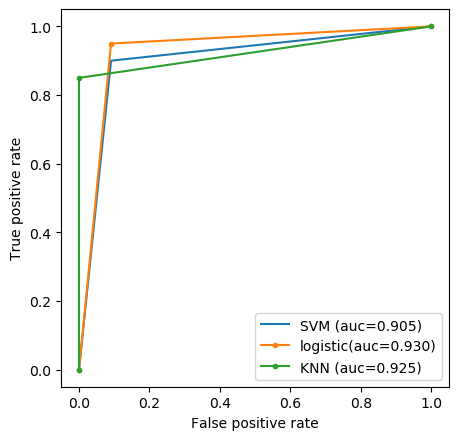

In [38]:

logistic_fpr,logistic_tpr,threshold=roc_curve(y_test,y_predict_lr)
auc_logistic=auc(logistic_fpr,logistic_tpr)


svm_fpr,svm_tpr,threshold=roc_curve(y_test,svc_predictions)
auc_svm=auc(svm_fpr,svm_tpr)

knn_fpr,knn_tpr,threshold=roc_curve(y_test,y_pred_knn)
auc_knn=auc(knn_fpr,knn_tpr)

plt.figure(figsize=(5,5),dpi=100)
plt.plot(svm_fpr,svm_tpr,linestyle='-',label='SVM (auc=%0.3f)' % auc_svm)
plt.plot(logistic_fpr,logistic_tpr,marker='.',label='logistic(auc=%0.3f)' % auc_logistic)
plt.plot(knn_fpr,knn_tpr,marker='.',label='KNN (auc=%0.3f)' % auc_knn)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.legend()
plt.show()